# Etivity 2: Data Preparation
* Student Name: Dylan Butler
* Student Number: 21218684

In [179]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [180]:
print(df.shape)

(2000, 17)


In [181]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

copy the data

In [182]:
df_ = df.copy()

In [183]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

## Process to Follow:
1. Encode Categorical Features
2. Deal with Missing Values
3. Scale Features
4. Outliers
5. Can we derive any features?

### (1) Dealing with categorical features

In [184]:
#id the categorical features
df.describe(include = 'object')

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

Looking at the categorical features we can encode most of these without any preprocessing. In the banks.csv example provided, a mapper was used for dependents, in our case there is nothing along these lines

1) encode categorical vars with nan values

In [185]:
nan_cat_cols=['job', 'education', 'contact', 'poutcome']

df = pd.get_dummies(df, columns=nan_cat_cols, 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

age  marital default  balance housing loan  day month  duration  \
1995  20.0   single      no     2785      no   no   16   sep       327   
1996  28.0   single      no      127      no   no   16   sep      1334   
1997  81.0  married      no     1154      no   no   17   sep       231   
1998  46.0  married      no     4343     yes   no   20   sep       185   
1999  40.0  married      no     6403      no   no   22   sep       208   

      campaign  ...  job_unemployed  job_nan education_secondary  \
1995         2  ...               0        0                   0   
1996         2  ...               0        0                   1   
1997         1  ...               0        0                   0   
1998         1  ...               0        0                   0   
1999         2  ...               0        0                   1   

      education_tertiary  education_nan  contact_telephone  contact_nan  \
1995                   0              1                  0            0   
1996                   0              0                  0            0   
1997                   0              0                  1            0   
1998                   0              0                  0            1   
1999                   0              0                  0            0   

      poutcome_other  poutcome_success  poutcome_nan  
1995               0                 0             1  
1996               0                 0             1  
1997               0                 0             1  
1998               0                 0             1  
1999               0                 0             1  

[5 rows x 32 columns]

2) encode all other categorical variables

In [186]:
df = pd.get_dummies(df, drop_first=True)
df.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0  32.0      392    1       957         2    131         2                0   
1  39.0      688    1       233         2    133         1                0   
2  59.0     1035    1       126         2    239         1                0   
3  47.0      398    1       274         1    238         2                1   
4  54.0     1004    1       479         1    307         1                0   

   job_entrepreneur  job_housemaid  ...  month_feb  month_jan  month_jul  \
0                 0              0  ...          0          0          0   
1                 0              0  ...          0          0          0   
2                 0              0  ...          0          0          0   
3                 0              0  ...          0          0          0   
4                 0              0  ...          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   subscribed_yes  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 43 columns]

### (2) Numerical features missing values

In [187]:
df.isna().sum()

age                    12
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may   

luckily, we are only missing 12 values from the `age` feature. We can use other features to try and impute the age for missing values.

We can generate a hypothesis that `job` along with `marital_status` can give us a good estimate of age. for example let's focus on using "student" and "single" as indicators for age.

Plotting a box plot with the above values:

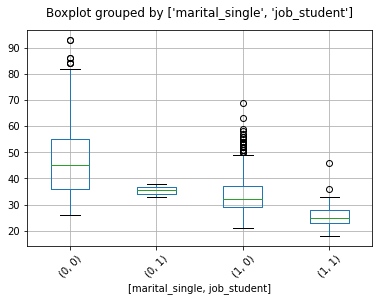

In [188]:
df.boxplot(column='age', by=['marital_single', 'job_student'], rot=45)
plt.title("")
plt.show()

there is a clear variation in age when it comes to these groups. Let's use the median values for these to impute the missing types

In [189]:
ptable = df.pivot_table(values='age', 
                        index='marital_single',
                        columns='job_student',  
                        aggfunc=np.median)

In [190]:
ptable

job_student        0     1
marital_single            
0               45.0  35.5
1               32.0  25.0

In [191]:
# Use function from guide notebook to implement these into the dataframe
def get_element(x):
    return ptable.loc[x['marital_single'], x['job_student']]
df['age']=df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1))

In [192]:
#make sure it worked
df.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0


### Before we rescale:

#### `Pdays`:
lets just look at pdays again, it mentions that the default for a customer not being contacted is "999" lets convert this 0 instead as 999 is an extreme outlier. Also the -1 days since contacted also doesn't make much sense so let's hypothesis that -1 is not previously contacted

#### `Duration`:
for machine learning purposes, we will drop the duration column. as it is impossible to know the duration before a call is performed - see note:
> this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

In [195]:
df.drop(['duration'], axis=1, inplace=True)

### 3) Rescalling the Numerical Features - Robust Scalar

In [196]:
num_cols=['balance', 'campaign', 'pdays', 'previous']

In [197]:
robust_scaler = RobustScaler()
df[num_cols] = robust_scaler.fit_transform(df[num_cols])

Initially, when we performed EDA on this dataset we noted a couple of outliers that where present in the dataset. Let's plot them as a boxplot and observe the results

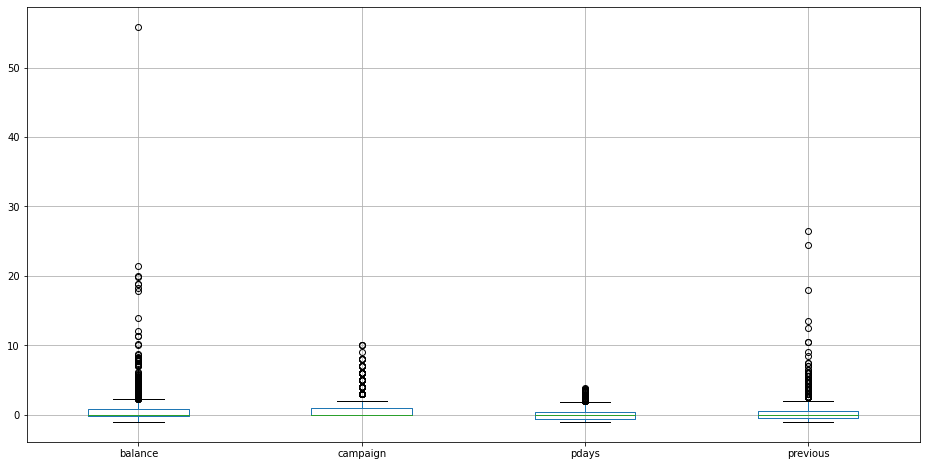

In [198]:
df.boxplot(column=num_cols, figsize=(16,8))
plt.show()

Obviously `day` is not going to have outlier but it is obvious that the others do. 

In [199]:
def plot_hist(df, col):
    fig=plt.figure(figsize=(16, 4))
    
    # Plot ApplicantIncome
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title(f"Histogram of {col}")
    ax1.set_xlabel(col)
    ax1.set_ylabel('Number of Prospects')
    df[col].hist(bins=20)
    
    plt.show()

In [200]:
num_cols

['balance', 'campaign', 'pdays', 'previous']

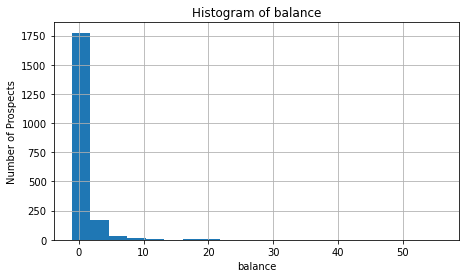

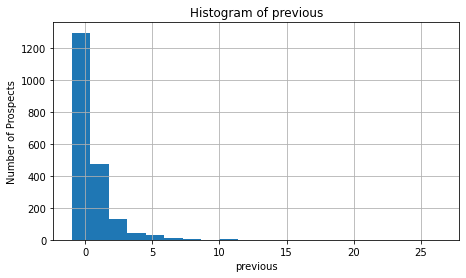

In [201]:
for col in ['balance', 'previous']:
    plot_hist(df, col)

`balance` is left skewed so we can try a log transform on these.Lets find the minimum values. `previous` has a lot of 0 values so we will need to deal with this separatly. 

In [202]:
df[['balance']].min()

balance   -1.060984
dtype: float64

In [203]:
df['balance'] = np.log(df['balance']+2.07)

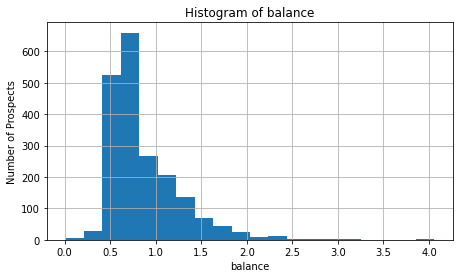

In [204]:
plot_hist(df, 'balance')

We've balanced out duration a bit better to represent a more gaussian distribution.

## Create Derived features - Removing outliers

### Age:
3 distinct patterns of how age influences the outcome variable (subscribed) come into play. 
* Young people (below 30 years old) and reaching or getting close to retirement (over 60 years old)seem to more willing to subscribe compared to middle aged people.
* simply split the age into 3 categories

In [207]:
#NOTE: need to use old values for age - revert to copied df
# bin or split numeric feature age into 3 groups of young middle-aged and old 
df['age']=pd.qcut(df_['age'], q=3,labels=['young', 'middle_aged', 'old'])

<AxesSubplot:>

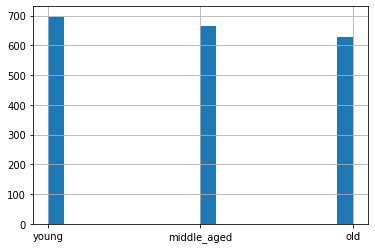

In [208]:
df.age.hist(bins=20)

In [209]:
df = pd.get_dummies(df, columns=['age'])

### Previous:
Prospects that were contacted at least 2 times in the previous campaign, are very likely to subscribe to a term deposit in comparison to others.
* we can combine these into a single category

In [211]:
#copy old values back in
df['previous']=df_.previous

In [212]:
#map new values
conditions  = [ df.previous == 0, df.previous==1, df.previous>=2 ]
choices     = [ '0', '1', '2_or_more' ]
#apply mapping
df.previous=np.select(conditions, choices, default="0")

<AxesSubplot:>

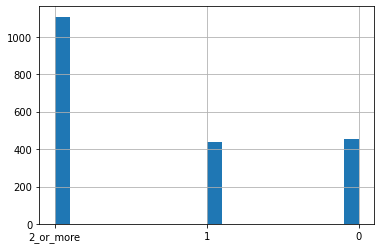

In [213]:
df.previous.hist(bins=20)

In [214]:
#convert to one_hot_encoded
df = pd.get_dummies(df, columns=['previous'])

## Reflection - Rubrick Analysis
* 1: __Categorical attributes encoded as numerical appropriately. Missing values appropriately filled in and imputation methods justified clearly.__
    * One-hot_encoded categorical attributes using pandas.get_dummies()
    * after analysing the dataset "age" was the only numerical value that had any nans present. In order to impute this I utilised information from two other columns. (1) `job` (2) `marital status`. I used the encode vars job_student and marital_single as these had good fluctuations in the median age. Used the median from above to replace age nans.
    * Pdays: converted this to 0 instead as 999 is an extreme outlier. Also the -1 days since contacted also doesn't make much sense so let's hypothesis that -1 is not previously contacted
    * Duration: dropped the column according to notes on dataset

* 2: __All outliers treated appropriately and all methods applied justified clearly. Scalers applied appropriately and clearly justified.__
    * ascaled the following numerical features: `['balance', 'campaign', 'pdays', 'previous']`
    * `balance` had a lot of outliers applied log transform to eliminate these
    * `previous` also had a lot of outliers. Took a different approach to eliminate: converted to categorical features. Based off previous analysis "Prospects that were contacted at least 2 times in the previous campaign, are very likely to subscribe to a term deposit in comparison to others." combined anything greater than 1

* 3 __Exceptionally clear demonstration of the usefulness of the new features.__
    * `Age` analysis indicated 'young' and 'old' more likely to deposit. again, converted these into a categorical feature
    * as mentioned above previous used to create new features to eliminate outliers 